     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------- -------------- 30.7/48.7 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 818.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.3 MB 4.1 MB/s eta 0:01:36
   ---------------------------------------- 0.1/390.3 MB 2.1 MB/s eta 0:03:02
   ---------------------------------------- 0.2/390.3 MB 2.1 MB/s eta 0:03:09
   ---------------------------------------- 0.3/390.3 MB 2.3 MB/s eta 0:02:47
   ---------------------------------------- 0.5/390.3 MB 2.4 MB/s eta 0:02:46
   ---------------------------------------- 0.6/390.3 MB 2.3 MB/s eta 0:02:49
   ---------------------------------------- 0.7/390.3 MB 2.5 MB/s eta 0:02:38
   ---------------------------------------- 0.7/390.3 MB 2.5 MB/s eta 0:02:37
   ---------------------------------------- 0.9/390.3 MB 2.5 MB/s eta 0:0

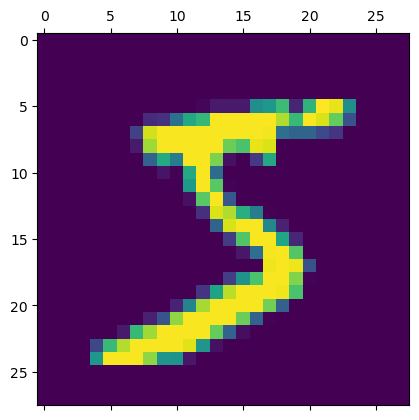

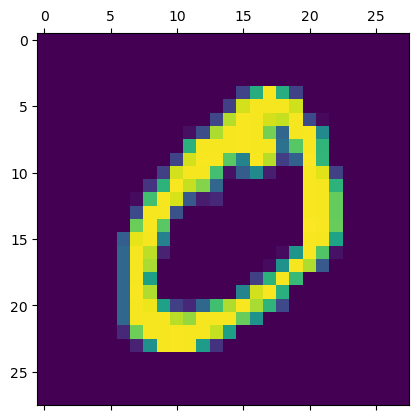

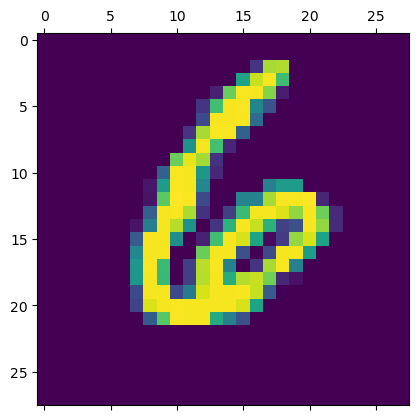

In [8]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
#% matplotlib inline
import numpy as np

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
print(len(X_train))
print(len(X_test))

X_train[0].shape
X_train[0]

plt.matshow(X_train[0])
print(y_train[0])

plt.matshow(X_train[1])
print(y_train[1])

plt.matshow(X_train[13])
print(y_train[13])

X_train = X_train / 255                 #normalizing the value to 1 help increase accuracy
X_test = X_test / 255

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)



In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

c:\Users\Aorus-4070\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 746us/step - accuracy: 0.7915 - loss: 0.7205
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.9189 - loss: 0.2850
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.9305 - loss: 0.2434
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.9364 - loss: 0.2229
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.9404 - loss: 0.2065
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.9422 - loss: 0.2003
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.9454 - loss: 0.1913
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.9478 - loss: 0.1833
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.9495 - loss: 0.1766
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 883us/step - accuracy: 0.9489 - loss: 0.1743


In [10]:
y_predicted = model.predict(X_test)
y_predicted[7]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step


array([1.7230619e-09, 8.6512625e-02, 8.0017315e-04, 7.8889780e-02,
       2.4860506e-01, 1.6874608e-01, 3.9097065e-07, 3.1311657e-02,
       8.9811631e-02, 9.6840507e-01], dtype=float32)

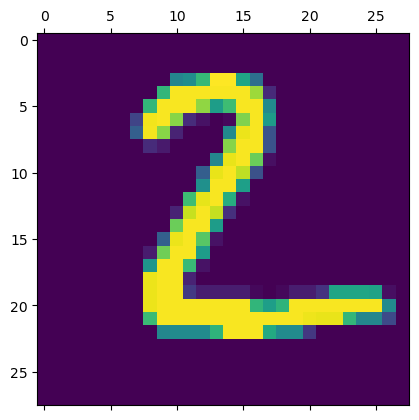

In [12]:
plt.matshow(X_test[1])

In [13]:
np.argmax(y_predicted[1])

2

In [14]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Text(95.72222222222221, 0.5, 'Truth')

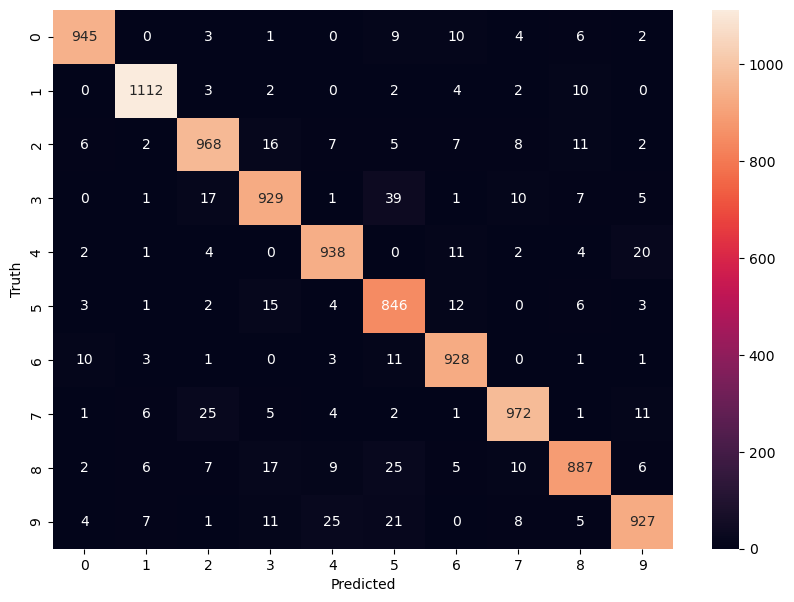

In [15]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')